In [6]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [7]:
torch.manual_seed(42)

In [8]:
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [9]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
#         print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [10]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [17]:
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
# xy = xy[::-1]  # reverse order

# # split train-test set
# train_size = int(len(xy) * 0.7)
# train_set = xy[0:train_size]
# test_set = xy[train_size - seq_length:]

# # scaling data
# train_set = minmax_scaler(train_set)
# test_set = minmax_scaler(test_set)

# # make train-test dataset to input
# trainX, trainY = build_dataset(train_set, seq_length)
# testX, testY = build_dataset(test_set, seq_length)

# # convert to tensor
# trainX_tensor = torch.FloatTensor(trainX)
# trainY_tensor = torch.FloatTensor(trainY)

# testX_tensor = torch.FloatTensor(testX)
# testY_tensor = torch.FloatTensor(testY)

In [18]:
xy

array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       ...,
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02]])

In [16]:
xy

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02]])

In [7]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x


net = Net(data_dim, hidden_dim, output_dim, 1)

In [8]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [9]:
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.17755335569381714
1 0.1292998492717743
2 0.09207893162965775
3 0.06546197086572647
4 0.04956132918596268
5 0.04449641704559326
6 0.047031693160533905
7 0.04982088506221771
8 0.0482671894133091
9 0.042574118822813034
10 0.03496405854821205
11 0.027620188891887665
12 0.021858572959899902
13 0.01803922839462757
14 0.015805872157216072
15 0.014416414313018322
16 0.013078353367745876
17 0.011228038929402828
18 0.008729384280741215
19 0.005972722545266151
20 0.003788408823311329
21 0.003066627075895667
22 0.004088185727596283
23 0.005982200149446726
24 0.007300890050828457
25 0.0073383222334086895
26 0.0064235772006213665
27 0.005303023848682642
28 0.004526105243712664
29 0.004210197366774082
30 0.0041535114869475365
31 0.004087365698069334
32 0.0038600300904363394
33 0.0034786174073815346
34 0.0030549888033419847
35 0.0027249425183981657
36 0.0025820424780249596
37 0.002642494160681963
38 0.00284543726593256
39 0.0030844055581837893
40 0.0032551982440054417
41 0.003297788556665182
42 0.

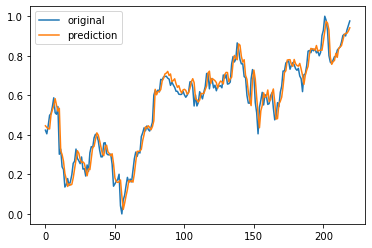

In [10]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()